<a href="https://colab.research.google.com/github/nishzsche/homl-guides/blob/main/4-training-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

In [7]:
X = 5 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [8]:
import matplotlib.pyplot as plt

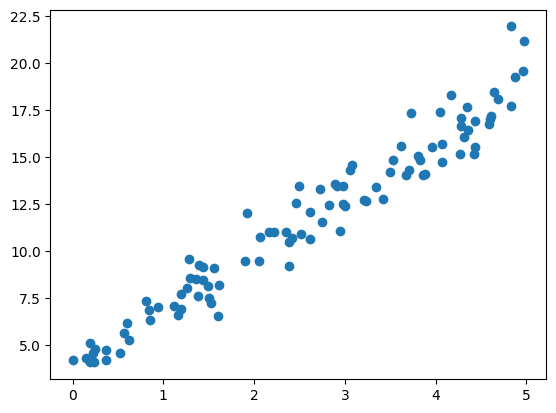

In [9]:
plt.scatter(X, y)
plt.show()

Lets compute $\bar{\theta}$ using the Normal Equation,

**np.c_**

* Translates slice objects to concatenation along the second axis.
* This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
useful because of its common occurrence. In particular, arrays will be
stacked along their last axis after being upgraded to at least 2-D with
1's post-pended to the shape (column vectors made out of 1-D arrays).

**np.ones**

Return a new array of given shape and type, filled with ones.

*Parameters*

* shape : int or sequence of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
* dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
* order : {'C', 'F'}, optional, default: C
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
* like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

In [23]:
X_b = np.c_[np.ones((100, 1)), X] # Add x0 = 1 to each instance

X_b[:5]

array([[1.        , 4.34161103],
       [1.        , 4.43382264],
       [1.        , 3.34124585],
       [1.        , 2.99685574],
       [1.        , 3.52574654]])

What is the Normal Equation, $\bar{\theta}$ = $(X^TX)^{-1}X^Ty$ ?
> The normal equation is a closed-form solution used to find the value of θ that minimizes the cost function. Another way to describe the normal equation is as a one-step algorithm used to analytically find the coefficients that minimize the loss function.

[Reference](https://www.datacamp.com/tutorial/tutorial-normal-equation-for-linear-regression)

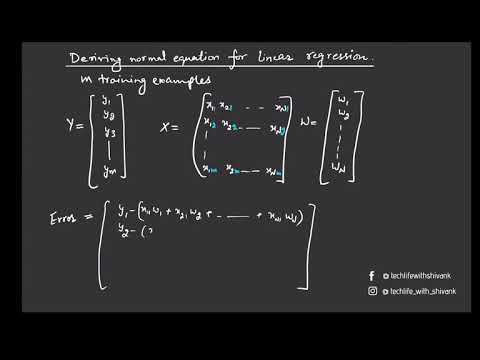

In [25]:
from IPython.display import YouTubeVideo

YouTubeVideo('g8qF61P741w', width=800, height=300)

In [24]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.9166053],
       [2.9998554]])

Making predictions using $\theta$ :

In [38]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [45]:
X_new = np.array([[0], [5], [2]])
X_new_b = np.c_[np.ones((3, 1)), X_new] # Add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9166053 ],
       [18.91588229],
       [ 9.9163161 ]])

In [28]:
plt.plot?

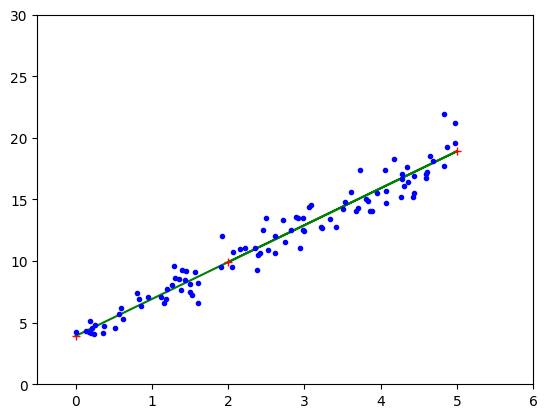

In [54]:
plt.plot(X_new, y_predict, "g-") # draws a line between X_new and y_predict
plt.plot(X_new, y_predict, "r+")
plt.plot(X, y, "b.")
plt.axis([-0.5, 6, 0, 30])
plt.show()

Linear regression using Scikit-Learn

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [58]:
print(lin_reg.intercept_, lin_reg.coef_)

[3.9166053] [[2.9998554]]


In [60]:
print(lin_reg.predict(X_new), y_predict)

[[ 3.9166053 ]
 [18.91588229]
 [ 9.9163161 ]] [[ 3.9166053 ]
 [18.91588229]
 [ 9.9163161 ]]
